In [1]:

# import modules
import pygmt
import numpy as np
import rioxarray
import geopandas as gpd
import seaborn as sns
import os
import pandas as pd

In [2]:

# define colours
# tab10: blue, orange, green, red, purple, brown, pink, grey, olive, cyan
colors_pre = sns.color_palette(sns.color_palette("tab10"))  # for the window sizes
colors = [colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          colors_pre[1],
          [0,0,0]]
print(np.shape(colors))


# a.plot(coords_L1888[:,0],coords_L1888[:,1],linewidth=2,color='tab:blue',label='L1888')
# a.plot(coords_L1948[:,0],coords_L1948[:,1],linewidth=2,color='tab:cyan',label='L1948')
# a.plot(coords_L1956_1[:,0],coords_L1956_1[:,1],linewidth=2,color='tab:red',label='L1956')
# a.plot(coords_L1956_2[:,0],coords_L1956_2[:,1],linewidth=2,color='tab:red')
# a.plot(coords_L1992[:,0],coords_L1992[:,1],linewidth=2,color='tab:purple',label='L1992')
# a.plot(coords_L1997[:,0],coords_L1997[:,1],linewidth=2,color='tab:olive',label='L1997')
# a.plot(coords_L1998[:,0],coords_L1998[:,1],linewidth=2,color='tab:green',label='L1998')
# a.plot(coords_CRATER[:,0],coords_CRATER[:,1],linewidth=2,color='black',linestyle='--',label='Crater rim')

### load topo data
grid_merapi = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/geo/TDX_Merapi_WGS84_5m.tif"
)

with rioxarray.open_rasterio(filename=grid_merapi) as img:
    image = img.load()  # Force loading the DataArray into memory

# calculate hillshade
dgrid = pygmt.grdgradient(grid=image[0], radiance=[270, 30])

### get EDM positions
pos_bad = np.array([110.410626, -7.526175])
reflectors = np.array(
    [[110.439757, -7.537567], [110.440165, -7.537451], [110.439260, -7.537533]]
)

### lava flows and crater
L1888_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1888_v2.shp"
)
L1948_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1948.shp"
)
L1956_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1956.shp"
)
L1992_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1992.shp"
)
L1997_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1997.shp"
)
L1998_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1998.shp"
)
L1986_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1986.shp"
)
L1984_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1984.shp"
)
L1931_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1931.shp"
)
OLD_CRATER_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/old_crater_rims.shp"
)

CRATER_FILE = "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/Merapi_crater.shp"
# Read the shapefile
L1948      = gpd.read_file(L1948_FILE)
L1888      = gpd.read_file(L1888_FILE)
L1956      = gpd.read_file(L1956_FILE)
L1992      = gpd.read_file(L1992_FILE)
L1997      = gpd.read_file(L1997_FILE)
L1998      = gpd.read_file(L1998_FILE)
L1986      = gpd.read_file(L1986_FILE)
L1984      = gpd.read_file(L1984_FILE)
L1931      = gpd.read_file(L1931_FILE)
OLD_CRATER = gpd.read_file(OLD_CRATER_FILE)
CRATER     = gpd.read_file(CRATER_FILE)

# Extract latitude and longitude into separate columns
coords_L1888   = np.array(list(L1888["geometry"][0].coords))
coords_L1956_1 = np.array(list(L1956["geometry"][0].coords))
coords_L1956_2 = np.array(list(L1956["geometry"][1].coords))
coords_L1948   = np.array(list(L1948["geometry"][0].coords))
coords_L1992   = np.array(list(L1992["geometry"][0].coords))
coords_L1997   = np.array(list(L1997["geometry"][0].coords))
coords_L1998   = np.array(list(L1998["geometry"][0].coords))
coords_L1986   = np.array(list(L1986["geometry"][0].coords))
coords_L1984   = np.array(list(L1984["geometry"][0].coords))
coords_L1931   = np.array(list(L1931["geometry"][0].coords))


coords_pas1_CRATER   = np.array(list(OLD_CRATER["geometry"][0].coords))
coords_pas2_CRATER   = np.array(list(OLD_CRATER["geometry"][1].coords))
coords_1822_CRATER   = np.array(list(OLD_CRATER["geometry"][2].coords))
coords_1872_CRATER   = np.array(list(OLD_CRATER["geometry"][3].coords))
coords_1904_1_CRATER = np.array(list(OLD_CRATER["geometry"][4].coords))
coords_1904_2_CRATER = np.array(list(OLD_CRATER["geometry"][5].coords))
coords_1932_CRATER   = np.array(list(OLD_CRATER["geometry"][6].coords))
coords_1961_1_CRATER = np.array(list(OLD_CRATER["geometry"][7].coords))
coords_1961_2_CRATER = np.array(list(OLD_CRATER["geometry"][8].coords))

coords_CRATER = np.array(list(CRATER["geometry"][0].coords))


# disp data
CSK_TS_FILE = '/Users/tz20896/Documents/PhD/projects/Merapi2021/CSK/dsc1/CSK_SPOT_dsc_win13_ts_inv.csv'
CSK_TS = pd.read_csv(CSK_TS_FILE)
# TSX
TSX_TS_FILE = '/Users/tz20896/Documents/PhD/projects/Merapi2021/TSX/staring_134/TSX_ST134_win13_ts_inv.csv'
TSX_TS = pd.read_csv(TSX_TS_FILE)

print(np.shape(CSK_TS))
print(np.shape(TSX_TS))

x_arr = np.array(image.x)
y_arr = np.array(image.y)

# set region
REGION = [
    pos_bad[0] - 0.005,
    np.max(x_arr),
    np.min(y_arr),
    np.max(y_arr),
    0,
    4000,
]

# get topo data for edge(where the high res can't reach)
coarse_grid = pygmt.datasets.load_earth_relief(resolution="01s", region=REGION)
coarse_dgrid = pygmt.grdgradient(grid=coarse_grid, radiance=[270, 30])

# define map region of interest
lon_lims = [110.425, 110.45]
lat_lims = [-7.55, -7.53]
REGION2 = [
    lon_lims[0],
    lon_lims[1],
    lat_lims[0],
    lat_lims[1],
    0,
    4000,
]
print(REGION)
print(REGION2)
MEAN_LON = int(np.round((REGION[0] + REGION[1]) / 2))
MEAN_LAT = int(np.round((REGION[2] + REGION[3]) / 2))
PROJECTION = "M15c"
PERSPECTIVE = [180, 90]
ZSIZE = "0.5c"
SHADING = True
PROJECTION_INSET = f"M5c"
AREA_THRESH = 10_000

# frame=["lSEt+tHillshade Map", "xa0.1", "ya0.1"],
pygmt.config(FORMAT_GEO_MAP="ddd.xx")





(11, 3)


grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from 110.405626 to 110.405555556
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 110.489216816 to 110.489444444
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from -7.589190447 to -7.58944444444
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from -7.497164647 to -7.49694444444


(282270, 113)
(48291, 33)
[110.405626, 110.489216816, -7.589190446999999, -7.497164647, 0, 4000]
[110.425, 110.45, -7.55, -7.53, 0, 4000]


In [3]:
# fig = pygmt.Figure()
# # define figure configuration

# # pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# pygmt.makecpt(cmap="geo", series=[800, 3000])
# # add SRTM topo
# fig.grdimage(
#     grid=coarse_grid,
#     region=REGION,
#     projection="M12c",
#     frame=["lSEt", "xa0.01", "ya0.01"],
#     cmap=True,
# )

# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# # add hillshade
# fig.grdimage(
#     grid=coarse_dgrid,
#     region=REGION,
#     projection="M12c",
#     transparency=30,
#     cmap=True,
# )

# # pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# pygmt.makecpt(cmap="geo", series=[800, 3000])
# # add SRTM topo
# fig.grdimage(
#     grid=image,
#     region=REGION,
#     projection="M12c",
#     frame=["lSEt", "xa0.01", "ya0.01"],
#     cmap=True,
# )


# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# # add SRTM hillshade
# fig.grdimage(
#     grid=dgrid,
#     region=REGION,
#     projection="M12c",
#     frame=["lSEt", "xa0.01", "ya0.01"],
#     transparency=30,
#     cmap=True,
# )


# # pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])

# # pos Badaban
# fig.plot(
#     x=pos_bad[0],
#     y=pos_bad[1],
#     style="s0.3c",
#     pen="0.5p,black",
#     fill="lightgreen",
#     label = 'Pos Badaban'
# )

# # EDM reflectors
# fig.plot(
#     x=reflectors[:, 0],
#     y=reflectors[:, 1],
#     style="i0.3c",
#     pen="0.5p,black",
#     fill="orange",
#     label = 'EDM reflectors'
# )

# # EDM line
# fig.plot(
#     x=[pos_bad[0], reflectors[1, 0]],
#     y=[pos_bad[1], reflectors[1, 1]],
#     pen="1p,red,-",
# )

# # CSK boundary
# fig.plot(
#     x=[110.4708, 110.4840, 110.4267,110.4135,110.4708],
#     y=[-7.5758, -7.5208, -7.5074, -7.5624,-7.5758],
#     pen="1p,black",
# )

# # TSX boundary
# fig.plot(
#     x=[110.4195, 110.4691, 110.4723, 110.4233, 110.4195],
#     y=[-7.5478, -7.5593, -7.5407, -7.5273, -7.5478],
#     pen="1p,black",
# )

# # zoom box
# fig.plot(
#     x=[lon_lims[0], lon_lims[1], lon_lims[1],lon_lims[0],lon_lims[0]],
#     y=[lat_lims[0], lat_lims[0], lat_lims[1],lat_lims[1],lat_lims[0]],
#     pen="1p,red",
# )

# # texts
# # Create space-delimited file
# with open("texts.txt", "w") as f:
#     f.write("110.41 -7.5 0 18p,Helvetica-Bold,black CM A\n")
#     f.write("110.426 -7.548 0 12p,Helvetica-Bold,black BL Panel B\n")
#     f.write("110.4705 -7.5752 -13 12p,Helvetica-Bold,black BR CSK dsc.\n")
#     f.write("110.4685 -7.5587 -13 12p,Helvetica-Bold,black BR TSX ST134 dsc.\n")


# # Plot region names / sea names from a text file, where
# # the longitude (x) and latitude (y) coordinates are in the first two columns.
# # Setting angle/font/justiry to True will indicate that those columns are
# # present in the text file too (Note: must be in that order!).
# # Finally, the text to be printed will be in the last column
# fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)

# # Cleanups
# os.remove("texts.txt")

# fig.legend()


# # inset figure of Java
# region = [105, 115, -9, -5.5]
# with fig.inset(
#     position="jBR+o0.1c",
#     region=[105, 115, -9, -5.5],
#     projection="U48L/5c",
# ):
#     # Highlight the Japan area in "lightbrown"
#     # and draw its outline with a pen of "0.2p".
#     fig.coast(
#         # Set the projection to Mercator, and plot size to 10 cm
#         # Set the region of the plot
#         region=[105, 115, -9, -5.5],
#         # Set the frame of the plot
#         frame="a",
#         # Set the color of the land to "darkgreen"
#         land="lightgrey",
#         # Set the color of the water to "lightblue"
#         water="white",
#         resolution="l",
#         # Draw national borders with a 1-point black line
#         borders="1/1p,black",
#     )
#     # Plot a rectangle ("r") in the inset map to show the area of the main
#     # figure. "+s" means that the first two columns are the longitude and
#     # latitude of the bottom left corner of the rectangle, and the last two
#     # columns the longitude and latitude of the uppper right corner.
#     rectangle = [[REGION[0], REGION[2], REGION[1], REGION[3]]]
#     Merapi_pos = [110.44, -7.53]
#     font = "15p,Helvetica-Bold"
#     fig.plot(
#         x=Merapi_pos[0],
#         y=Merapi_pos[1],
#         style="t0.3c",
#         pen="0.5p,black",
#         fill="darkred",
#     )
#     fig.text(x=Merapi_pos[0] - 2, y=Merapi_pos[1] + 0.5, text="Java", font=font)


# # Shift plot origin of the second map by 12.5 cm in x direction
# fig.shift_origin(xshift="14.5c", yshift="3.5c")

# fig.grdimage(
#     grid=dgrid,
#     region=REGION2,
#     projection="M12c",
#     frame=["lSEt", "xa0.01", "ya0.01"],
#     cmap=True,
# )


# pygmt.makecpt(
#     cmap='viridis',
#     series=[0,20,0.1],
#     continuous=True,
#     reverse=False,
# )

# plot_data = np.hypot(CSK_TS.iloc[:,-2],CSK_TS.iloc[:,-1])
# fig.plot(
#     x=CSK_TS['Longitude'],
#     y=CSK_TS['Latitude'],
#     style='c2p',
#     color = plot_data,
#     cmap = True)

# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])


# for lava, color, lab in zip([coords_L1888,coords_L1948,coords_L1956_1,coords_L1956_2,coords_L1992,coords_L1997,coords_L1998,coords_CRATER,],colors, ['L1888','L1948','L1956',[],'L1992','L1997','L1998','Crater rim']):
#     print(lava)
#     print(color)
#     if lab == []:
#         fig.plot(
#             x=list(lava[:, 0]),
#             y=list(lava[:, 1]),
#             pen=f"2p,{color[0]*255}/{color[1]*255}/{color[2]*255},-",
#         )
#     else:
#         fig.plot(
#             x=list(lava[:, 0]),
#             y=list(lava[:, 1]),
#             pen=f"2p,{color[0]*255}/{color[1]*255}/{color[2]*255},-",
#         )

# fig.plot(
#         x=list(coords_CRATER[:,0]),
#         y=list(coords_CRATER[:,1]),
#         pen=f"2p,black,-.",
#         label='Crater rim'
#     )
# fig.plot(
#     x=reflectors[:, 0],
#     y=reflectors[:, 1],
#     style="i0.3c",
#     pen="0.5p,black,-",
#     fill="orange",
# )


# fig.plot(
#     x=[pos_bad[0], reflectors[1, 0]],
#     y=[pos_bad[1], reflectors[1, 1]],
#     pen="1p,red,-",
# )

# fig.plot(
#     x=[110.437, lon_lims[0]+0.0002],
#     y=[-7.536, -7.542],
#     pen="1p,red",
# )

# # texts
# # Create space-delimited file
# with open("texts.txt", "w") as f:
#     f.write("110.426 -7.5305 0 18p,Helvetica-Bold,black TL B\n")

# fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
# # Cleanups
# os.remove("texts.txt")

# # zoom box
# fig.plot(
#     x=[110.437, 110.441, 110.441, 110.437, 110.437],
#     y=[-7.539, -7.539, -7.536, -7.536, -7.539],
#     pen="1p,red",
# )

# fig.legend()
# pygmt.config(MAP_FRAME_PEN='5p,red')
# # inset figure of Java
# region = [110.437, 110.441, -7.539, -7.536]
# with fig.inset(
#     position="jBL+o0.1c",
#     region=region,
#     projection="M5c",
# ):
    

#     fig.grdimage(
#     grid=dgrid,
#     frame=["lset", "xa0.01", "ya0.01"],
#     cmap=True,
#     )
#     fig.coast(water ='skyblue',map_scale = 'n0.5/0.1+w200e')

#     # EDM reflectors
#     fig.plot(
#         x=reflectors[:, 0],
#         y=reflectors[:, 1],
#         style="i0.3c",
#         pen="0.5p,black",
#         fill="orange",
#     )

#     # EDM line
#     fig.plot(
#         x=[pos_bad[0], reflectors[1, 0]],
#         y=[pos_bad[1], reflectors[1, 1]],
#         pen="1p,red,-",
#     )

#     fig.plot(
#         x=list(coords_L1888[:,0]),
#         y=list(coords_L1888[:,1]),
#         pen=f"2p,{colors[0][0]*255}/{colors[0][1]*255}/{colors[0][2]*255},-",
#     )


#     # texts
#     # Create space-delimited file
#     with open("texts.txt", "w") as f:
#         f.write(f"{reflectors[0,0]} {reflectors[0,1]-0.0002} 0 12p,Helvetica-Bold,black TL RB1\n")
#         f.write(f"{reflectors[1,0]} {reflectors[1,1]+0.0002} 0 12p,Helvetica-Bold,black BL RB2\n")
#         f.write(f"{reflectors[2,0]} {reflectors[2,1]-0.0002} 0 12p,Helvetica-Bold,black TR RB3\n")

#     fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
#     # Cleanups
#     os.remove("texts.txt")

# print('got to the end')
# fig.savefig("/Users/tz20896/Documents/PhD/projects/Merapi_volc/Merapi_figures/Merapi_overview_EDM.png")
# fig.savefig("/Users/tz20896/Documents/PhD/projects/Merapi_volc/Merapi_figures/Merapi_overview_EDM.pdf")
# fig.show()

# pygmt.config(MAP_FRAME_PEN='5p,black')


/var/folders/7b/9xvft5dd0455jpkm_r7rgr3w0000gp/T/ipykernel_52561/765435364.py:127: SyntaxWarning: Short-form parameter (Td) is not recommended. Use long-form parameter 'rose' instead.
  fig.basemap(map_scale = 'n0.25/0.03+c-7.5412+w20k+f+l',Td='g-110.25/-7.85+w2c')
/var/folders/7b/9xvft5dd0455jpkm_r7rgr3w0000gp/T/ipykernel_52561/765435364.py:324: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


[[110.44311424  -7.53750184]
 [110.44295135  -7.53739078]
 [110.44275884  -7.53734635]
 [110.44264777  -7.53731674]
 [110.44245527  -7.53726491]
 [110.44229237  -7.53720567]
 [110.44214429  -7.53715385]
 [110.44202582  -7.53699836]
 [110.44192217  -7.5368947 ]
 [110.44184072  -7.53685768]
 [110.44168698  -7.53679845]
 [110.44156619  -7.53675818]
 [110.44145211  -7.53671792]
 [110.44135817  -7.53663739]
 [110.44126422  -7.53655687]
 [110.44115685  -7.53648976]
 [110.44106962  -7.53642937]
 [110.44094883  -7.53634885]
 [110.44080791  -7.53626832]
 [110.44064015  -7.53621464]
 [110.44048581  -7.53614753]
 [110.44033818  -7.53608714]
 [110.44014358  -7.53600661]
 [110.43992884  -7.53592609]
 [110.439782    -7.53584815]
 [110.43966292  -7.53585588]
 [110.43951332  -7.53593394]
 [110.4394873   -7.53595995]
 [110.43940925  -7.53600548]
 [110.43939624  -7.53607703]
 [110.43940925  -7.5361811 ]
 [110.4393853   -7.53630187]
 [110.43952622  -7.53640253]
 [110.43958661  -7.53646963]
 [110.43970069

/var/folders/7b/9xvft5dd0455jpkm_r7rgr3w0000gp/T/ipykernel_52561/765435364.py:474: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


got to the end


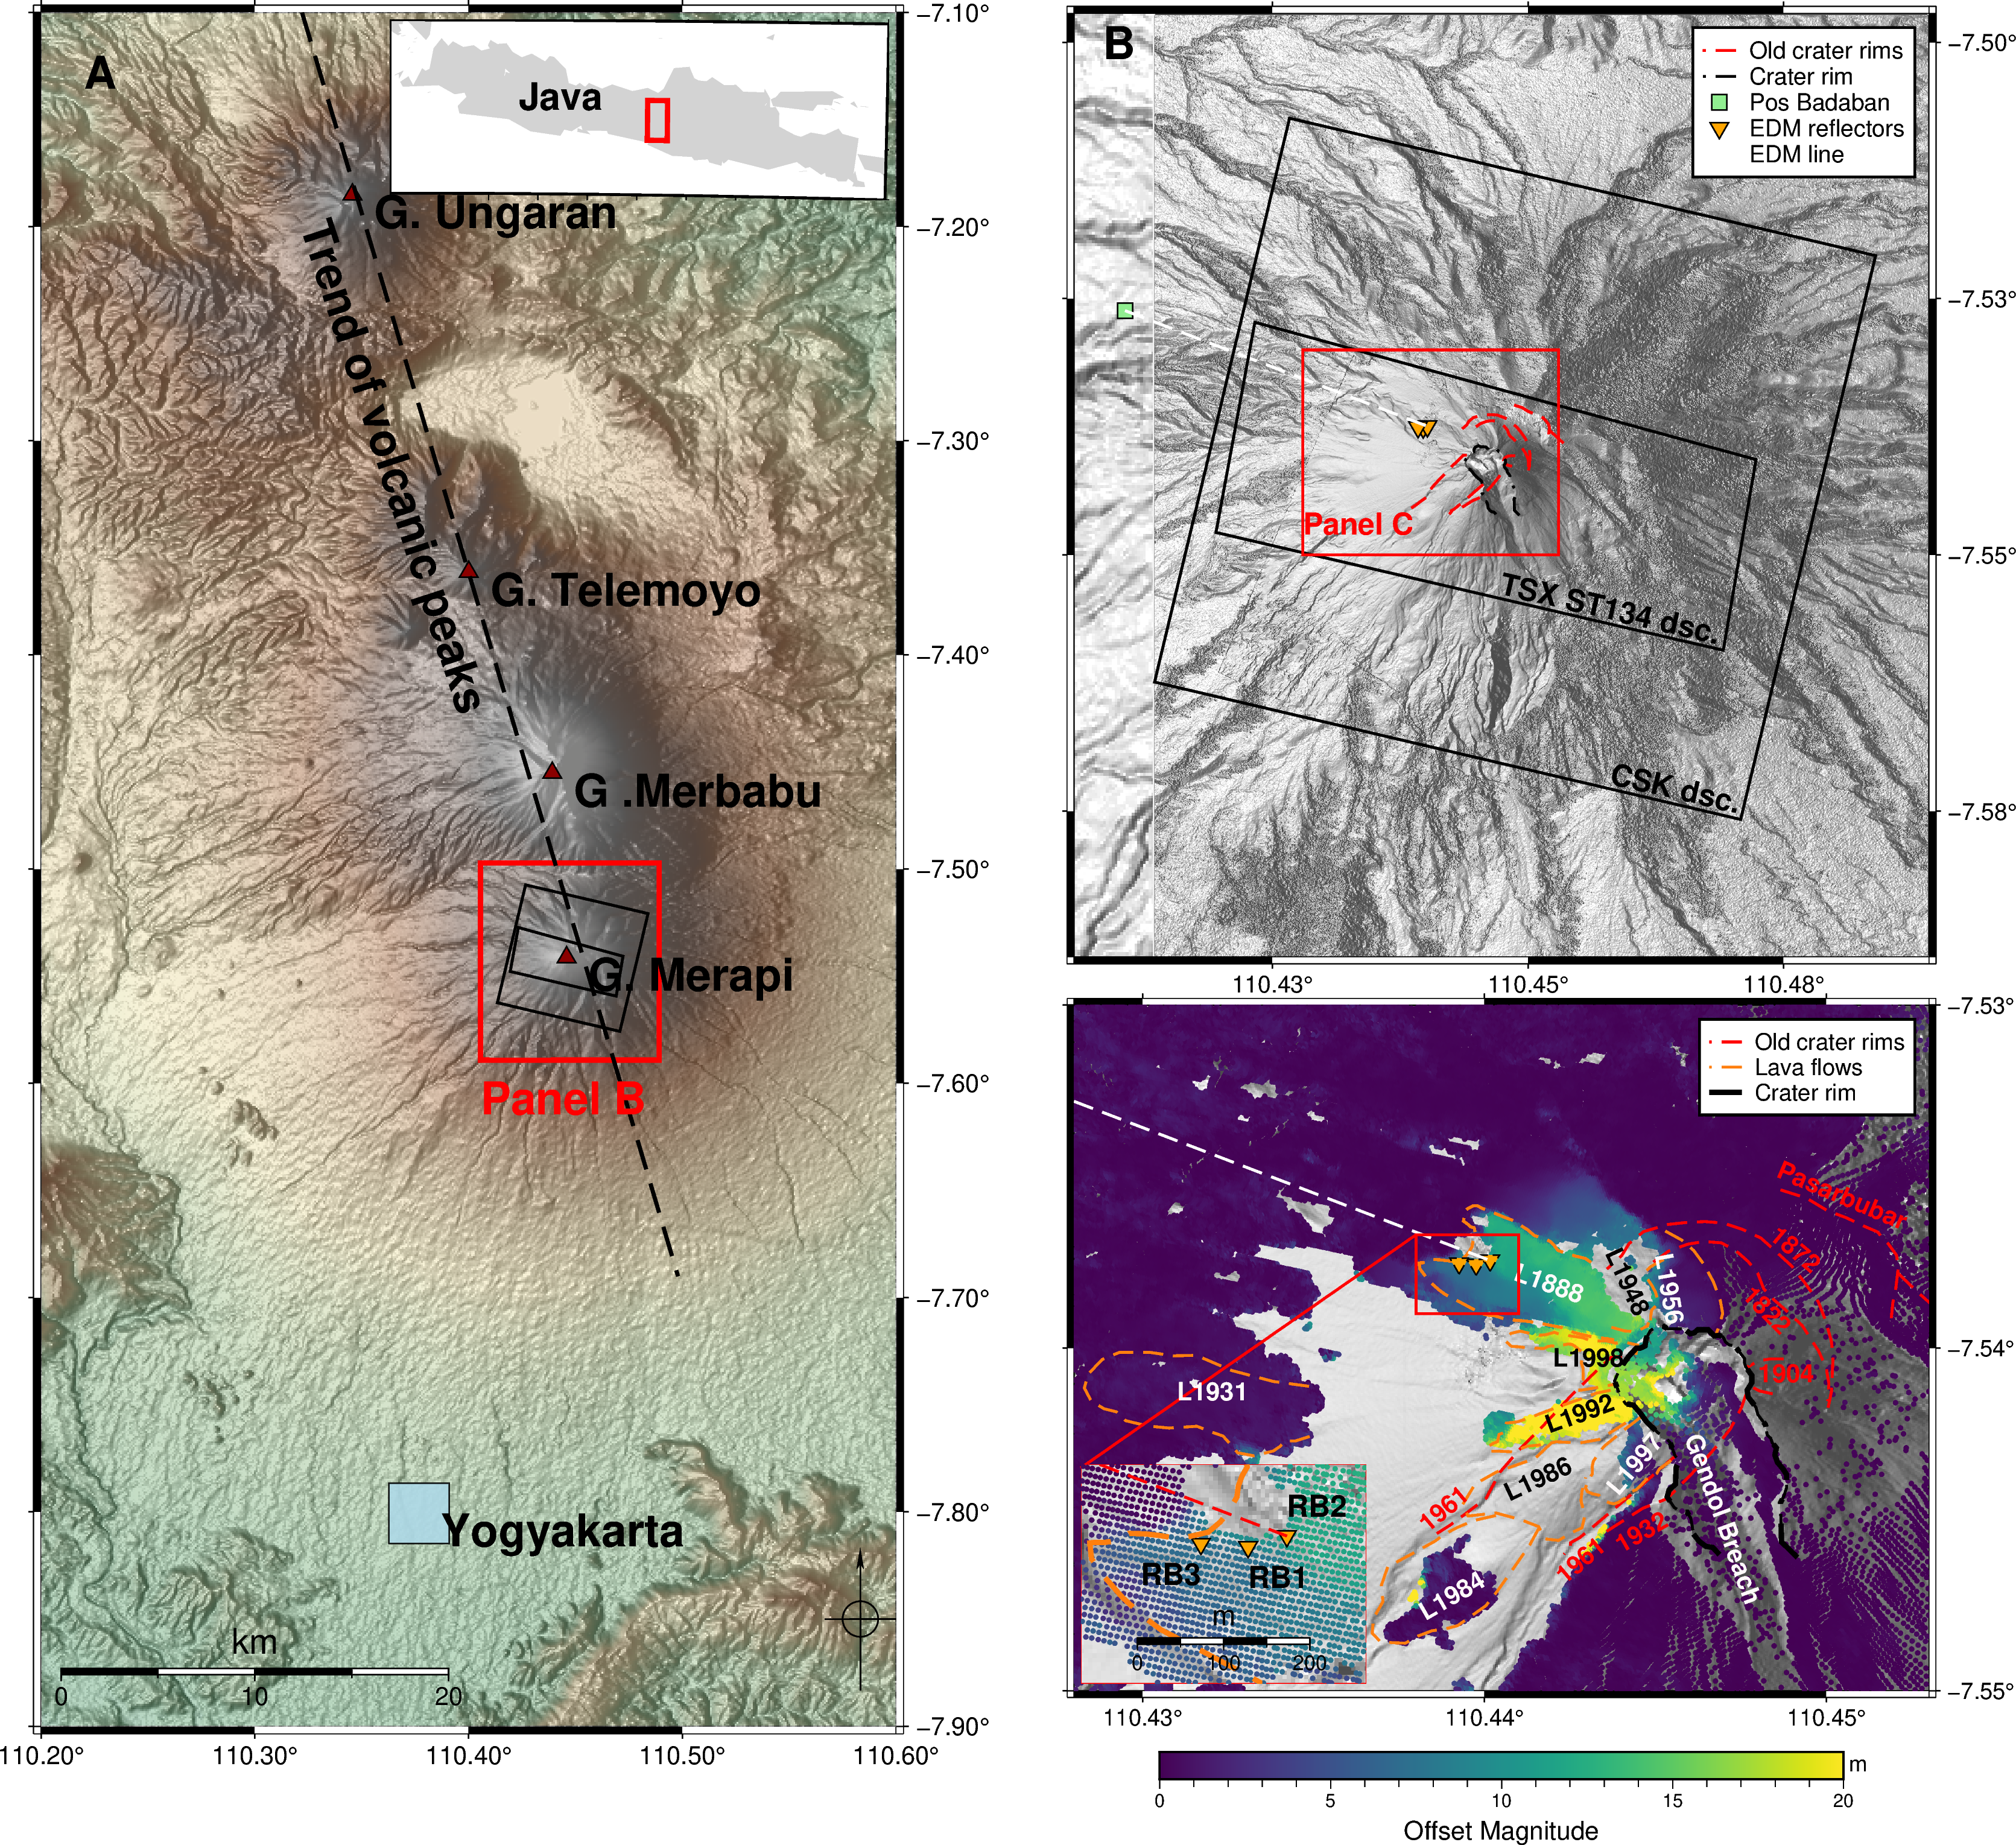

In [15]:


REGION_big = [
    110.2,
    110.6,
    -7.9,
    -7.1,
    0,
    4000,
]

# define map region of interest
lon_lims = [110.428, 110.453]
lat_lims = [-7.55, -7.53]
REGION2 = [
    lon_lims[0],
    lon_lims[1],
    lat_lims[0],
    lat_lims[1],
    0,
    4000,
]

coarse_grid_big = pygmt.datasets.load_earth_relief(resolution="03s", region=REGION_big)
coarse_dgrid_big = pygmt.grdgradient(grid=coarse_grid_big, radiance=[270, 30])


# frame=["lSEt+tHillshade Map", "xa0.1", "ya0.1"],
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(MAP_FRAME_PEN='5p,black')


########################################
############ panel A ###################
########################################

fig = pygmt.Figure()
# define figure configuration

# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
pygmt.makecpt(cmap="geo", series=[0, 3000])
# add SRTM topo
fig.grdimage(
    grid=coarse_grid_big,
    region=REGION_big,
    projection="M12c",
    frame=["lSEt", "xa0.1", "ya0.1"],
    cmap=True,
)

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# add hillshade
fig.grdimage(
    grid=coarse_dgrid_big,
    region=REGION_big,
    projection="M12c",
    transparency=30,
    cmap=True,
)


fig.plot(x=[REGION[0],REGION[0],REGION[1],REGION[1],REGION[0],],
         y=[REGION[2],REGION[3],REGION[3],REGION[2],REGION[2],],
         pen="2p,red",)



yogyakarta_pos = [110.3768,-7.8007]
Ungaran_pos = [110.3457,-7.1850]
Telemoyo_pos = [110.4001,-7.3613]
Merbabu_pos = [110.4392,-7.4551]
Merapi_pos = [110.4459, -7.5412]
font = "15p,Helvetica-Bold"
fig.plot(
    x=[Merapi_pos[0],Merbabu_pos[0],Telemoyo_pos[0],Ungaran_pos[0]],
    y=[Merapi_pos[1],Merbabu_pos[1],Telemoyo_pos[1],Ungaran_pos[1]],
    style="t0.3c",
    pen="0.5p,black",
    fill="darkred",
)

fig.plot(
    x=yogyakarta_pos[0],
    y=yogyakarta_pos[1],
    style="s1.2c",
    pen="0.5p,black",
    fill="lightblue",
    transparency=10,
)

fig.plot(
    x = [110.315, 110.498],
    y = [-7.076, -7.690],
    pen="1.5p,black,-",
)

# CSK boundary
fig.plot(
    x=[110.4708, 110.4840, 110.4267,110.4135,110.4708],
    y=[-7.5758, -7.5208, -7.5074, -7.5624,-7.5758],
    pen="1p,black",
)

# TSX boundary
fig.plot(
    x=[110.4195, 110.4691, 110.4723, 110.4233, 110.4195],
    y=[-7.5478, -7.5593, -7.5407, -7.5273, -7.5478],
    pen="1p,black",
)

# texts
# Create space-delimited file
with open("texts.txt", "w") as f:
    f.write(f"110.22 -7.12 0 18p,Helvetica-Bold,black TL A \n")
    f.write(f"{Merapi_pos[0]+0.01} {Merapi_pos[1]} 0 18p,Helvetica-Bold,black TL G. Merapi \n")
    f.write(f"{Merbabu_pos[0]+0.01} {Merbabu_pos[1]} 0 18p,Helvetica-Bold,black TL G .Merbabu \n")
    f.write(f"{Telemoyo_pos[0]+0.01} {Telemoyo_pos[1]} 0 18p,Helvetica-Bold,black TL G. Telemoyo \n")
    f.write(f"{Ungaran_pos[0]+0.01} {Ungaran_pos[1]} 0 18p,Helvetica-Bold,black TL G. Ungaran \n")
    f.write(f"{yogyakarta_pos[0]+0.01} {yogyakarta_pos[1]} 0 18p,Helvetica-Bold,black TL Yogyakarta \n")
    f.write(f"{REGION[0]} {REGION[2]-0.01} 0 18p,Helvetica-Bold,red TL Panel B \n")
    f.write(f"{Ungaran_pos[0]-0.01} {Ungaran_pos[1]-0.01} -72 18p,Helvetica-Bold,black TL Trend of volcanic peaks \n")


fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
# Cleanups
os.remove("texts.txt")

# fig.coast(water ='skyblue',map_scale = 'n0.25/0.03+c-7.5412+w20k+f+l',Td='g-110.25/-7.85+w2c')
fig.basemap(map_scale = 'n0.25/0.03+c-7.5412+w20k+f+l',Td='g-110.25/-7.85+w2c')

# inset figure of Java
pygmt.config(MAP_FRAME_PEN='1p,black')
region = [105, 115, -9, -5.5]


########################################
############ panel A Java ##############
########################################
with fig.inset(
    position="jTR+o0.1c",
    region=[105, 115, -9, -5.5],
    projection="U48L/7c",
):
    pygmt.config(MAP_FRAME_PEN='1p,black')
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    fig.coast(
        # Set the projection to Mercator, and plot size to 10 cm
        # Set the region of the plot
        region=[105, 115, -9, -5.5],
        # Set the frame of the plot
        frame = ["wsne","xa1","ya1"],
        # Set the color of the land to "darkgreen"
        land="lightgrey",
        # Set the color of the water to "lightblue"
        water="white",
        resolution="l",
        # Draw national borders with a 1-point black line
        borders="1/1p,black",
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main
    # figure. "+s" means that the first two columns are the longitude and
    # latitude of the bottom left corner of the rectangle, and the last two
    # columns the longitude and latitude of the uppper right corner.
    fig.plot(x=[REGION_big[0],REGION_big[0],REGION_big[1],REGION_big[1],REGION_big[0],],
             y=[REGION_big[2],REGION_big[3],REGION_big[3],REGION_big[2],REGION_big[2],],
             pen="2p,red",)

    Merapi_pos = [110.44, -7.53]
    font = "15p,Helvetica-Bold"

    fig.text(x=Merapi_pos[0] - 2, y=Merapi_pos[1] + 0.5, text="Java", font=font)



# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin(xshift="14.5c", yshift="10.8c")

########################################
############ panel B ###################
########################################

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# add hillshade
fig.grdimage(
    grid=coarse_dgrid,
    region=REGION,
    projection="M12c",
    cmap=True,
)


pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# add SRTM hillshade
fig.grdimage(
    grid=dgrid,
    region=REGION,
    projection="M12c",
    frame=["lSEt", "xa0.025", "ya0.025"],
    cmap=True,
)

    
#### crater rims
label_rims = 1
for rim in [coords_pas1_CRATER,coords_pas2_CRATER,coords_1822_CRATER,coords_1872_CRATER,coords_1904_1_CRATER,coords_1904_2_CRATER,coords_1932_CRATER,coords_1961_1_CRATER,coords_1961_2_CRATER]:
    if label_rims == 1:
        label_rims = 0
        fig.plot(
            x=list(rim[:,0]),
            y=list(rim[:,1]),
            pen="1p,red,-",
            label = 'Old crater rims'
        )
    else:
        fig.plot(
            x=list(rim[:,0]),
            y=list(rim[:,1]),
            pen="1p,red,-",
        )

fig.plot(
        x=list(coords_CRATER[:,0]),
        y=list(coords_CRATER[:,1]),
        pen=f"1p,black,-.",
        label= 'Crater rim',
    )
# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])

# pos Badaban
fig.plot(
    x=pos_bad[0],
    y=pos_bad[1],
    style="s0.3c",
    pen="0.5p,black",
    fill="lightgreen",
    label = 'Pos Badaban'
)

# EDM reflectors
fig.plot(
    x=reflectors[:, 0],
    y=reflectors[:, 1],
    style="i0.3c",
    pen="0.5p,black",
    fill="orange",
    label = 'EDM reflectors'
)

# EDM line
fig.plot(
    x=[pos_bad[0], reflectors[1, 0]],
    y=[pos_bad[1], reflectors[1, 1]],
    pen="1p,white,-",
    label='EDM line'
)

# CSK boundary
fig.plot(
    x=[110.4708, 110.4840, 110.4267,110.4135,110.4708],
    y=[-7.5758, -7.5208, -7.5074, -7.5624,-7.5758],
    pen="1p,black",
)

# TSX boundary
fig.plot(
    x=[110.4195, 110.4691, 110.4723, 110.4233, 110.4195],
    y=[-7.5478, -7.5593, -7.5407, -7.5273, -7.5478],
    pen="1p,black",
)

# zoom box
fig.plot(
    x=[lon_lims[0], lon_lims[1], lon_lims[1],lon_lims[0],lon_lims[0]],
    y=[lat_lims[0], lat_lims[0], lat_lims[1],lat_lims[1],lat_lims[0]],
    pen="1p,red",
)

# texts
# Create space-delimited file
with open("texts.txt", "w") as f:
    f.write("110.41 -7.5 0 18p,Helvetica-Bold,black CM B\n")
    f.write("110.428 -7.548 0 12p,Helvetica-Bold,red BL Panel C\n")
    f.write("110.4705 -7.5752 -13 12p,Helvetica-Bold,black BR CSK dsc.\n")
    f.write("110.4685 -7.5587 -13 12p,Helvetica-Bold,black BR TSX ST134 dsc.\n")
    


# Plot region names / sea names from a text file, where
# the longitude (x) and latitude (y) coordinates are in the first two columns.
# Setting angle/font/justiry to True will indicate that those columns are
# present in the text file too (Note: must be in that order!).
# Finally, the text to be printed will be in the last column
fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)

# Cleanups
os.remove("texts.txt")

fig.legend()

# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin( yshift="-10.3c")

########################################
############ panel C ###################
########################################


fig.grdimage(
    grid=dgrid,
    region=REGION2,
    projection="M12c",
    frame=["lSEt", "xa0.01", "ya0.01"],
    cmap=True,
)

pygmt.makecpt(
    cmap='viridis',
    series=[0,20,0.1],
    continuous=True,
    background=True,
    reverse=False,
)

plot_data = np.hypot(CSK_TS.iloc[:,-2],CSK_TS.iloc[:,-1])
fig.plot(
    x=CSK_TS['Longitude'],
    y=CSK_TS['Latitude'],
    style='c2p',
    color = plot_data,
    cmap = True)

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])

#### crater rims
label_rims = 1
for rim in [coords_pas1_CRATER,coords_pas2_CRATER,coords_1822_CRATER,coords_1872_CRATER,coords_1904_1_CRATER,coords_1904_2_CRATER,coords_1932_CRATER,coords_1961_1_CRATER,coords_1961_2_CRATER]:
    if label_rims == 1:
        label_rims = 0
        fig.plot(
            x=list(rim[:,0]),
            y=list(rim[:,1]),
            pen="1p,red,-",
            label = 'Old crater rims'
        )
    else:
        fig.plot(
            x=list(rim[:,0]),
            y=list(rim[:,1]),
            pen="1p,red,-",
        )


# plot lava flows
for lava, color, lab in zip([coords_L1888,coords_L1948,coords_L1956_1,coords_L1956_2,coords_L1992,coords_L1997,coords_L1998,coords_L1986,coords_L1984,coords_L1931,coords_CRATER,],colors, ['L1888','L1948','L1956',[],'L1992','L1997','L1998','L1986','L1984','L1931','Crater rim']):
    print(lava)
    print(color)
    if lab == []:
        fig.plot(
            x=list(lava[:, 0]),
            y=list(lava[:, 1]),
            pen=f"1p,{color[0]*255}/{color[1]*255}/{color[2]*255},-",
        )
    else:
        fig.plot(
            x=list(lava[:, 0]),
            y=list(lava[:, 1]),
            pen=f"1p,{color[0]*255}/{color[1]*255}/{color[2]*255},-",
        )
    
# plot again for legend
fig.plot(
        x=list(coords_L1888[:, 0]),
        y=list(coords_L1888[:, 1]),
        pen=f"1p,{colors[0][0]*255}/{colors[0][1]*255}/{colors[0][2]*255},-",
        label= 'Lava flows'
        )

fig.plot(
        x=list(coords_CRATER[:,0]),
        y=list(coords_CRATER[:,1]),
        pen=f"2p,black,-.",
        label= 'Crater rim',
    )

# EDM reflectors
fig.plot(
    x=reflectors[:, 0],
    y=reflectors[:, 1],
    style="i0.3c",
    pen="0.5p,black,-",
    fill="orange",
)

# EDM line
fig.plot(
    x=[pos_bad[0], reflectors[1, 0]],
    y=[pos_bad[1], reflectors[1, 1]],
    pen="1p,white,-",
)
# red line for zoom box
fig.plot(
    x=[110.438, lon_lims[0]+0.0002],
    y=[-7.5367, -7.5435],
    pen="1p,red",
)

# texts
# Create space-delimited file
with open("texts.txt", "w") as f:
    f.write("110.426 -7.5305 0 18p,Helvetica-Bold,snow TL C\n")
    f.write("110.44636 -7.54243 -70 10p,Helvetica-Bold,snow TL Gendol Breach\n")
    f.write("110.44100 -7.53750 -20 10p,Helvetica-Bold,snow TL L1888\n")
    f.write("110.43100 -7.54100   0 10p,Helvetica-Bold,snow TL L1931\n")
    f.write("110.44400 -7.53700 -65 10p,Helvetica-Bold,black TL L1948\n")
    f.write("110.44550 -7.53720 -80 10p,Helvetica-Bold,snow TL L1956\n")
    f.write("110.43800 -7.5475   30 10p,Helvetica-Bold,snow TL L1984\n")
    f.write("110.44050 -7.54400  25 10p,Helvetica-Bold,black TL L1986\n")
    f.write("110.44170 -7.54200  20 10p,Helvetica-Bold,black TL L1992\n")
    f.write("110.44350 -7.54400  50 10p,Helvetica-Bold,snow TL L1997\n")
    f.write("110.44200 -7.54000   0 10p,Helvetica-Bold,black TL L1998\n")

    f.write("110.4485  -7.535  -23 10p,Helvetica-Bold,red BL Pasarbubar\n")
    f.write("110.4475 -7.5385  -45 10p,Helvetica-Bold,red BL 1822\n")
    f.write("110.4483 -7.5368  -40 10p,Helvetica-Bold,red BL 1872\n")
    f.write("110.448  -7.541     0 10p,Helvetica-Bold,red BL 1904\n")
    f.write("110.444  -7.546    30 10p,Helvetica-Bold,red BL 1932\n")
    f.write("110.442  -7.5465   40 10p,Helvetica-Bold,red TL 1961\n")
    f.write("110.438  -7.545    40 10p,Helvetica-Bold,red TL 1961\n")

fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
# Cleanups
os.remove("texts.txt")

# zoom box
fig.plot(
    x=[110.438, 110.441, 110.441, 110.438, 110.438],
    y=[-7.539, -7.539, -7.5367, -7.5367, -7.539],
    pen="1p,red",
)

fig.legend()
fig.colorbar(cmap="viridis", frame=["xa5f1+lOffset Magnitude", "y+lm"],scale=20)

########################################
############ panel C Inset #############
########################################


# inset figure of Java
region = [110.438, 110.441, -7.539, -7.5367]
with fig.inset(
    position="jBL+o0.1c",
    region=region,
    projection="M4c",
):
    pygmt.config(MAP_FRAME_PEN='5p,red')
    # pygmt.config( FONT_ANNOT_PRIMARY= "15p,Helvetica-Bold,snow",FONT_LABEL="15p,Helvetica-Bold,snow")
    fig.grdimage(
    grid=dgrid,
    frame=["lset", "xa0.01", "ya0.01"],
    cmap=True,
    )
    

    # pygmt.config( FONT_ANNOT_PRIMARY= "15p,Helvetica-Bold,black",FONT_LABEL="15p,Helvetica-Bold,black")

    pygmt.makecpt(
        cmap='viridis',
        series=[0,20,0.1],
        continuous=True,
        reverse=False,
    )

    plot_data = np.hypot(CSK_TS.iloc[:,-2],CSK_TS.iloc[:,-1])
    fig.plot(
        x=CSK_TS['Longitude'],
        y=CSK_TS['Latitude'],
        style='c2p',
        color = plot_data,
        cmap = True)

    pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])


    # EDM reflectors
    fig.plot(
        x=reflectors[:, 0],
        y=reflectors[:, 1],
        style="i0.3c",
        pen="0.5p,black",
        fill="orange",
    )

    # EDM line
    fig.plot(
        x=[pos_bad[0], reflectors[1, 0]],
        y=[pos_bad[1], reflectors[1, 1]],
        pen="1p,red,-",
    )

    fig.plot(
        x=list(coords_L1888[:,0]),
        y=list(coords_L1888[:,1]),
        pen=f"2p,{colors[0][0]*255}/{colors[0][1]*255}/{colors[0][2]*255},-",
    )


    # texts
    # Create space-delimited file
    with open("texts.txt", "w") as f:
        f.write(f"{reflectors[0,0]} {reflectors[0,1]-0.0002} 0 12p,Helvetica-Bold,black TL RB1\n")
        f.write(f"{reflectors[1,0]} {reflectors[1,1]+0.0002} 0 12p,Helvetica-Bold,black BL RB2\n")
        f.write(f"{reflectors[2,0]} {reflectors[2,1]-0.0002} 0 12p,Helvetica-Bold,black TR RB3\n")

    fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
    # Cleanups
    os.remove("texts.txt")
    fig.coast(water ='skyblue',map_scale = 'n0.5/0.18+c-7.5412+w200e+f+l')

print('got to the end')
fig.savefig("/Users/tz20896/Documents/PhD/projects/Merapi_volc/Merapi_figures/Merapi_overview_EDM_3.png")
fig.savefig("/Users/tz20896/Documents/PhD/projects/Merapi_volc/Merapi_figures/Merapi_overview_EDM_3.pdf")
fig.show()

# fig.colorbar(cmap="viridis", frame=["xa5f1+lRange offset", "y+lm"],scale=20)
# fig.coast(water ='skyblue',map_scale = 'n0.5/0.1+w200e')
